In [ ]:
from math import *
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [ ]:
swap = np.array([2.14, 2.22, 2.33, 2.43, 2.51, 2.59, 2.66, 2.73, 2.79, 2.84, 2.89, 2.94, 2.98, 3.02, 3.05, 3.07, 3.09, 3.11, 3.12, 3.13])/100

In [ ]:
def bootstrap(swap):

    # calcul des facteurs d’actualisation (discount factors)
    d = np.zeros(20)
    d[0] = 1/(1 + swap[0])
    for i in range(1, 20):
        d[i] = (1 - swap[i]*sum(d[0:(i-1)])) / (1 + swap[i])

    # calcul des taux spot
    i = (1/d)**(1/(np.arange(1,21))) - 1
    return i

In [ ]:
def f(m, b):
    b0 = b[0]
    b1 = b[1]
    b2 = b[2]
    b3 = b[3]
    t1 = b[4]
    t2 = b[5]
    """
    Modèle de Nelson-Siegel-Svensson de la courbe de taux forward instantanée
    """
    return (b0 + b1*exp(-m/t1) + b2*m/t1*exp(-m/t1) + b3*m/t2*exp(-m/t2))

In [ ]:
def i(m, b):
    """
    Calcul des taux spot i(m,b) à partir des paramètres du modèle de Nelson-Siegel-Svensson
    """
    b0 = b[0]
    b1 = b[1]
    b2 = b[2]
    b3 = b[3]
    t1 = b[4]
    t2 = b[5]
    
    return(b0 + b1*(1 - exp(-m/t1)/(m/t1)) + b2*( (1-exp(-m/t1))/(m/t1) - exp(-m/t1) ) + b3*( (1-exp(-m/t2))/(m/t2) - exp(-m/t2) ))

In [ ]:
def d(m, b):
    return(exp(-(i(m, b)*m)))

In [ ]:
def res(b):
    """
    résidus 
    """
    i_est = np.array([i(m, b) for m in range(1,21)])
    i_obs = bootstrap(swap)
    return (i_est - i_obs)

In [ ]:
optim = sp.optimize.least_squares(res, [0, 0, 0, 0, 0.1, 0.1], bounds = ([0, -inf, -inf, -inf, 0.1, 0.1],[inf, inf, inf, inf, inf, inf]))

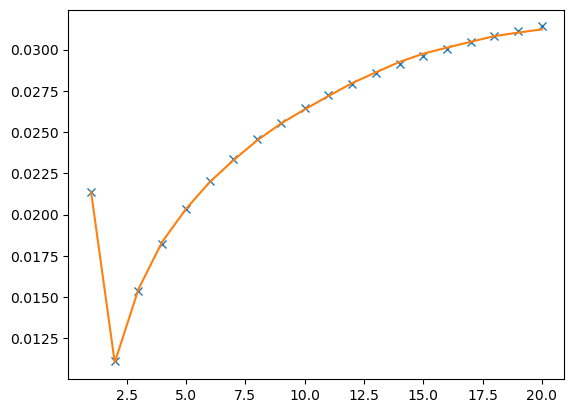

In [ ]:
b = optim.get("x")
i_curve = np.array([i(m, b) for m in range(1,21)])
plt.plot(np.arange(1,21), i_curve, "x")
plt.plot(np.arange(1,21), bootstrap(swap))